# 🏈 NFL Championship Predictor - XGBoost Machine Learning

This notebook demonstrates a complete machine learning system for predicting NFL Super Bowl champions using **XGBoost**.

## System Overview
- **Problem Type**: Binary Classification (per team)
- **Algorithm**: XGBoost (Gradient Boosting)
- **Validation**: Time-Based Cross-Validation
- **Target**: Championship Probability
- **Features**: Team performance statistics (Win %, Points, etc.)

**Author**: Data Science Demo  
**Date**: February 2026

## 1. Import Required Libraries

## 0. Install Required Packages (Run Once)

Run this cell once to install all required packages in the Jupyter kernel. After running, you can restart the kernel.

In [1]:
# Install required packages in Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost scikit-learn pandas numpy matplotlib seaborn joblib

print("\n✅ Installation complete! Please restart the kernel: Kernel > Restart Kernel")


✅ Installation complete! Please restart the kernel: Kernel > Restart Kernel



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import sys
import os

# Add src directory to path to import custom modules
sys.path.append('src')

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Import ML libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    log_loss, roc_auc_score, brier_score_loss,
    classification_report, confusion_matrix, roc_curve, auc
)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


## 2. Load Pre-Trained Model and Data

We'll load the trained XGBoost model and prepared data to demonstrate predictions and analysis.

In [3]:
from train_model import NFLChampionshipPredictor
from data_preparation import prepare_data, SUPER_BOWL_WINNERS
from predict import predict_championship_probabilities

# Load the trained model
print("Loading trained XGBoost model...")
predictor = NFLChampionshipPredictor.load_model('models/championship_model.pkl')

# Load prepared data
print("\nLoading NFL data...")
df = prepare_data()

print(f"\n📊 Dataset Overview:")
print(f"   • Total team-seasons: {len(df)}")
print(f"   • Years: {df['Year'].min()} - {df['Year'].max()}")
print(f"   • Champions: {int(df['Won_SB'].sum())}")
print(f"   • Features: {len(predictor.features)}")

print("\n✅ Model and data loaded successfully!")

Loading trained XGBoost model...
✅ Model loaded from models/championship_model.pkl
   Trained on: 2026-02-08 21:33:12

Loading NFL data...
🔄 Loading scraped data...
   Raw data shape: (800, 7)
🧹 Cleaning team names...
🔢 Converting numeric columns...
⚙️  Engineering features...
🏆 Adding Super Bowl winner labels...

✅ Cleaned data shape: (608, 10)
   Champions in dataset: 19.0
   Years covered: 2005 - 2023
💾 Saved cleaned data to data/nfl_ml_ready.csv

📊 Dataset Overview:
   • Total team-seasons: 608
   • Years: 2005 - 2023
   • Champions: 19
   • Features: 10

✅ Model and data loaded successfully!


## 3. Model Performance Metrics

Time-based cross-validation results showing how well the model predicts on unseen seasons.

📈 Time-Based Cross-Validation Results:
 test_year  log_loss  roc_auc  brier_score  n_train  n_test
      2010  0.093777 0.935484     0.030081      160      32
      2011  0.233486 0.709677     0.059222      192      32
      2012  0.090617 1.000000     0.026905      224      32
      2013  0.077700 0.967742     0.024612      256      32
      2014  0.235467 0.548387     0.048275      288      32
      2015  0.151728 0.838710     0.035191      320      32
      2016  0.037902 1.000000     0.009525      352      32
      2017  0.148904 0.774194     0.031065      384      32
      2018  0.129019 0.903226     0.036314      416      32
      2019  0.113045 0.870968     0.031260      448      32
      2020  0.147792 0.806452     0.032059      480      32
      2021  0.154552 0.709677     0.034856      512      32
      2022  0.104314 0.935484     0.032780      544      32
      2023  0.102215 0.903226     0.028968      576      32

📊 Average Performance:
   • Log Loss (lower is better):    0

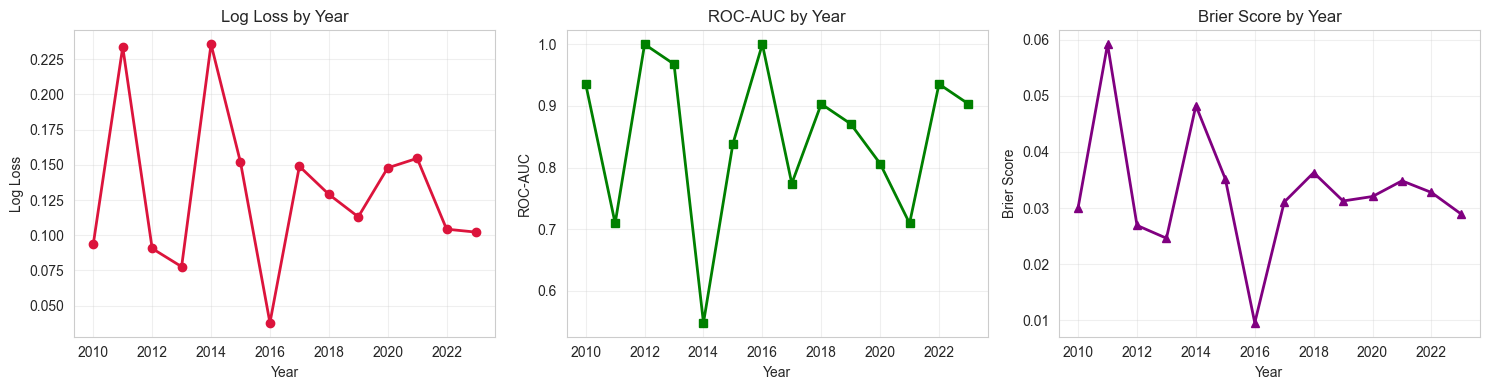

In [4]:
# Load CV results
cv_results = pd.read_csv('results/cv_results.csv')

print("📈 Time-Based Cross-Validation Results:")
print("="*70)
print(cv_results.to_string(index=False))

print(f"\n📊 Average Performance:")
print(f"   • Log Loss (lower is better):    {cv_results['log_loss'].mean():.4f} ± {cv_results['log_loss'].std():.4f}")
print(f"   • ROC-AUC (higher is better):    {cv_results['roc_auc'].mean():.4f} ± {cv_results['roc_auc'].std():.4f}")
print(f"   • Brier Score (lower is better): {cv_results['brier_score'].mean():.4f} ± {cv_results['brier_score'].std():.4f}")

# Visualize CV performance
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(cv_results['test_year'], cv_results['log_loss'], marker='o', linewidth=2, color='crimson')
axes[0].set_title('Log Loss by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Log Loss')
axes[0].grid(alpha=0.3)

axes[1].plot(cv_results['test_year'], cv_results['roc_auc'], marker='s', linewidth=2, color='green')
axes[1].set_title('ROC-AUC by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('ROC-AUC')
axes[1].grid(alpha=0.3)

axes[2].plot(cv_results['test_year'], cv_results['brier_score'], marker='^', linewidth=2, color='purple')
axes[2].set_title('Brier Score by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Brier Score')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Predict Championship Probabilities (2023 Season)

In [5]:
# Predict for 2023 season
year = 2023
predictions = predict_championship_probabilities(predictor, df, year=year)

print(f"🏈 Championship Predictions for {year} Season:")
print("="*70)
print(predictions.head(15).to_string(index=False))

# Identify actual champion
actual_champion = SUPER_BOWL_WINNERS.get(year, "Unknown")
predicted_champion = predictions.iloc[0]['Team']

print(f"\n🎯 Predicted Champion: {predicted_champion}")
print(f"   Probability: {predictions.iloc[0]['Championship_Prob']*100:.2f}%")
print(f"\n🏆 Actual Champion: {actual_champion}")

# Check if prediction was correct
if predicted_champion == actual_champion:
    print("   ✅ CORRECT PREDICTION!")
else:
    actual_rank = predictions[predictions['Team'] == actual_champion]['Rank'].values
    if len(actual_rank) > 0:
        print(f"   ❌ Incorrect (Actual champion ranked #{actual_rank[0]})")

🏈 Championship Predictions for 2023 Season:
 Rank                 Team  Championship_Prob  Win_Pct  Point_Diff
    1  San Francisco 49ers           0.191186    0.706         193
    2   Kansas City Chiefs           0.173131    0.647          77
    3        Buffalo Bills           0.137126    0.647         140
    4       Dallas Cowboys           0.090087    0.706         194
    5  Philadelphia Eagles           0.081312    0.647           5
    6        Detroit Lions           0.051937    0.706          66
    7     Baltimore Ravens           0.046757    0.765         203
    8       Miami Dolphins           0.022652    0.647         105
    9     Cleveland Browns           0.015876    0.647          34
   10   Cincinnati Bengals           0.010155    0.529         -18
   11 Jacksonville Jaguars           0.008228    0.529           6
   12       Denver Broncos           0.005536    0.471         -56
   13     Los Angeles Rams           0.005205    0.588          27
   14       Housto

## 5. Feature Importance - What Drives Championship Predictions?

🧠 Feature Importance Rankings:
       Feature  Importance
       Win_Pct    0.292694
            PD    0.191049
       Prev_PD    0.122426
  Prev_Win_Pct    0.104806
     PD_Change    0.096972
   Pts_Against    0.069086
       Pts_For    0.068080
Win_Pct_Change    0.054888
         PA_PG    0.000000
           PPG    0.000000


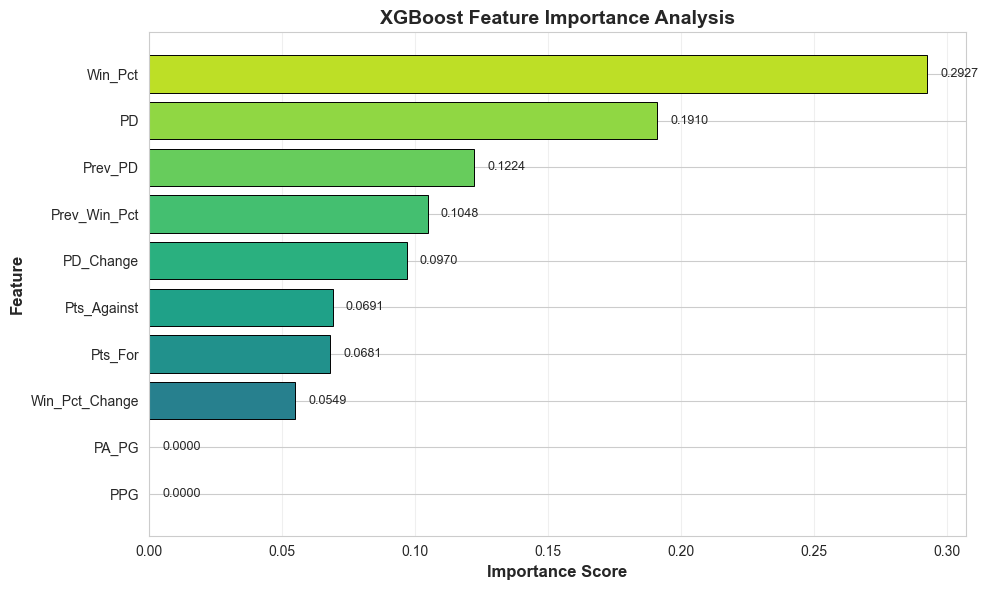


💡 Key Insights:
   • Most important feature: Win_Pct (0.2927)
   • Top 3 features account for 60.6% of model's decisions


In [6]:
# Extract feature importance
importance_df = pd.DataFrame({
    'Feature': predictor.features,
    'Importance': predictor.model.feature_importances_
}).sort_values('Importance', ascending=False)

print("🧠 Feature Importance Rankings:")
print("="*70)
print(importance_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(importance_df)))
bars = plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1], 
                color=colors, edgecolor='black', linewidth=0.7)

plt.xlabel('Importance Score', fontsize=12, weight='bold')
plt.ylabel('Feature', fontsize=12, weight='bold')
plt.title('XGBoost Feature Importance Analysis', fontsize=14, weight='bold')
plt.grid(axis='x', alpha=0.3)

for i, (feat, imp) in enumerate(zip(importance_df['Feature'][::-1], importance_df['Importance'][::-1])):
    plt.text(imp + 0.005, i, f'{imp:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print(f"   • Most important feature: {importance_df.iloc[0]['Feature']} ({importance_df.iloc[0]['Importance']:.4f})")
print(f"   • Top 3 features account for {importance_df['Importance'].head(3).sum():.1%} of model's decisions")

## 6. Historical Prediction Accuracy

How well does the model predict past Super Bowl winners?

📊 Historical Validation Results:
 Year            Predicted               Actual Correct  Actual_Rank Actual_Prob
 2018   New Orleans Saints New England Patriots       ❌            3      14.08%
 2019   Kansas City Chiefs   Kansas City Chiefs       ✅            1      23.31%
 2020     Baltimore Ravens Tampa Bay Buccaneers       ❌            7       4.78%
 2021 Tampa Bay Buccaneers     Los Angeles Rams       ❌            3      16.11%
 2022   Kansas City Chiefs   Kansas City Chiefs       ✅            1      29.47%
 2023  San Francisco 49ers   Kansas City Chiefs       ❌            2      17.31%

📈 Prediction Accuracy: 33.3%
   • Correct: 2 / 6
   • Average rank of actual champion: 2.8


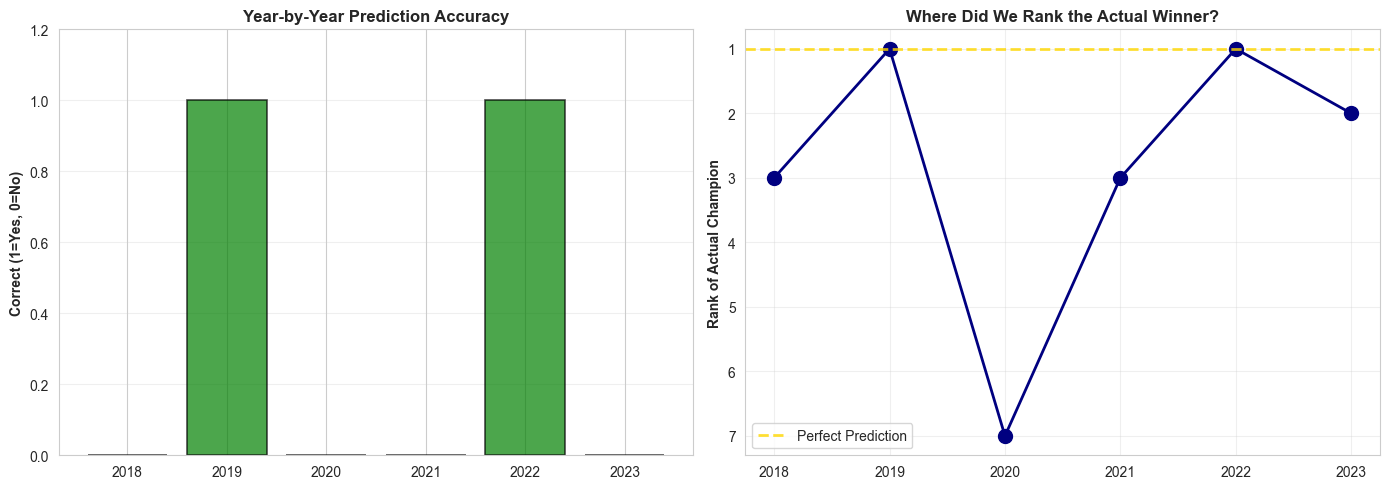

In [7]:
# Validate predictions against historical champions
validation_years = [2018, 2019, 2020, 2021, 2022, 2023]
results = []

for year in validation_years:
    preds = predict_championship_probabilities(predictor, df, year=year)
    if preds is None:
        continue
    
    predicted = preds.iloc[0]['Team']
    actual = SUPER_BOWL_WINNERS.get(year, "Unknown")
    
    actual_rank = preds[preds['Team'] == actual]['Rank'].values
    actual_prob = preds[preds['Team'] == actual]['Championship_Prob'].values
    
    results.append({
        'Year': year,
        'Predicted': predicted,
        'Actual': actual,
        'Correct': '✅' if predicted == actual else '❌',
        'Actual_Rank': actual_rank[0] if len(actual_rank) > 0 else None,
        'Actual_Prob': f"{actual_prob[0]*100:.2f}%" if len(actual_prob) > 0 else "N/A"
    })

results_df = pd.DataFrame(results)

print("📊 Historical Validation Results:")
print("="*70)
print(results_df.to_string(index=False))

accuracy = (results_df['Correct'] == '✅').sum() / len(results_df)
print(f"\n📈 Prediction Accuracy: {accuracy*100:.1f}%")
print(f"   • Correct: {(results_df['Correct'] == '✅').sum()} / {len(results_df)}")
print(f"   • Average rank of actual champion: {results_df['Actual_Rank'].mean():.1f}")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy by year
colors = ['green' if c == '✅' else 'red' for c in results_df['Correct']]
ax1.bar(results_df['Year'], [1 if c == '✅' else 0 for c in results_df['Correct']], 
        color=colors, edgecolor='black', linewidth=1.2, alpha=0.7)
ax1.set_ylabel('Correct (1=Yes, 0=No)', fontweight='bold')
ax1.set_title('Year-by-Year Prediction Accuracy', fontweight='bold')
ax1.set_ylim(0, 1.2)
ax1.grid(axis='y', alpha=0.3)

# Actual champion rank
ax2.plot(results_df['Year'], results_df['Actual_Rank'], 
         marker='o', linewidth=2, markersize=10, color='navy')
ax2.axhline(1, color='gold', linestyle='--', linewidth=2, label='Perfect Prediction', alpha=0.8)
ax2.set_ylabel('Rank of Actual Champion', fontweight='bold')
ax2.set_title('Where Did We Rank the Actual Winner?', fontweight='bold')
ax2.invert_yaxis()
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. View Generated Visualizations

Display the comprehensive visualizations created by the pipeline.


📊 Win % vs Championship Status


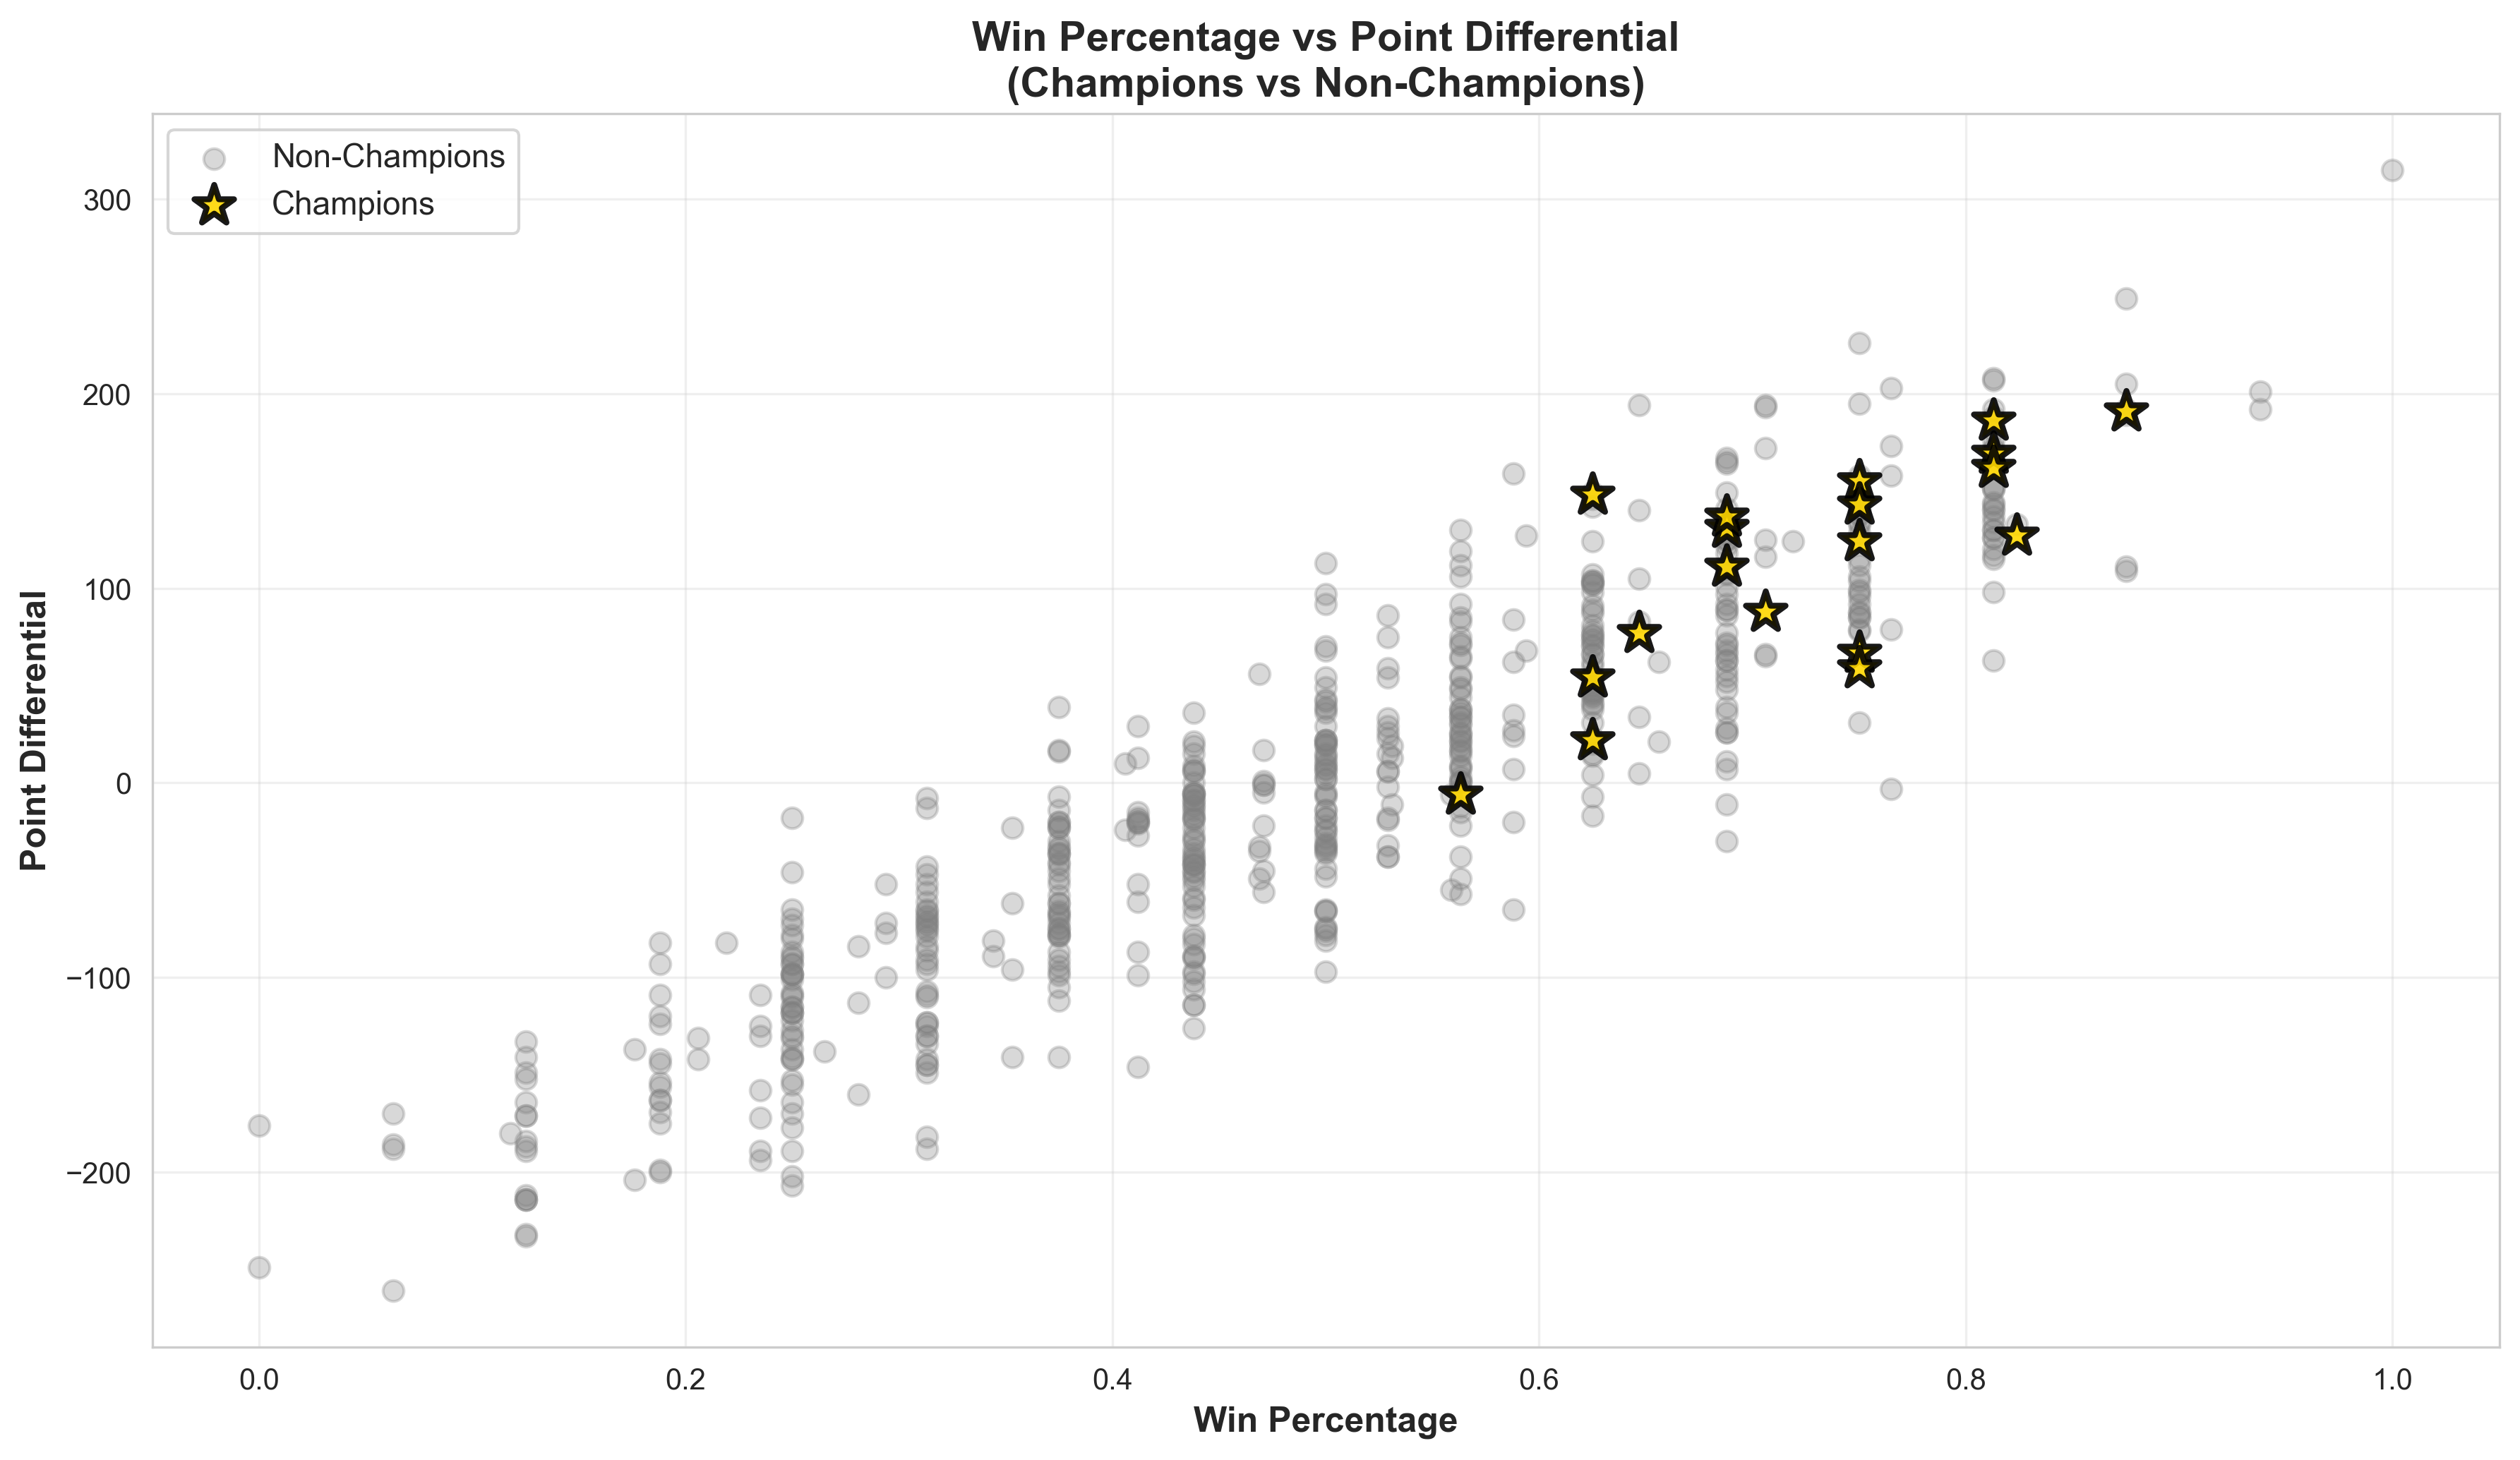


📊 2023 Championship Probability Distribution


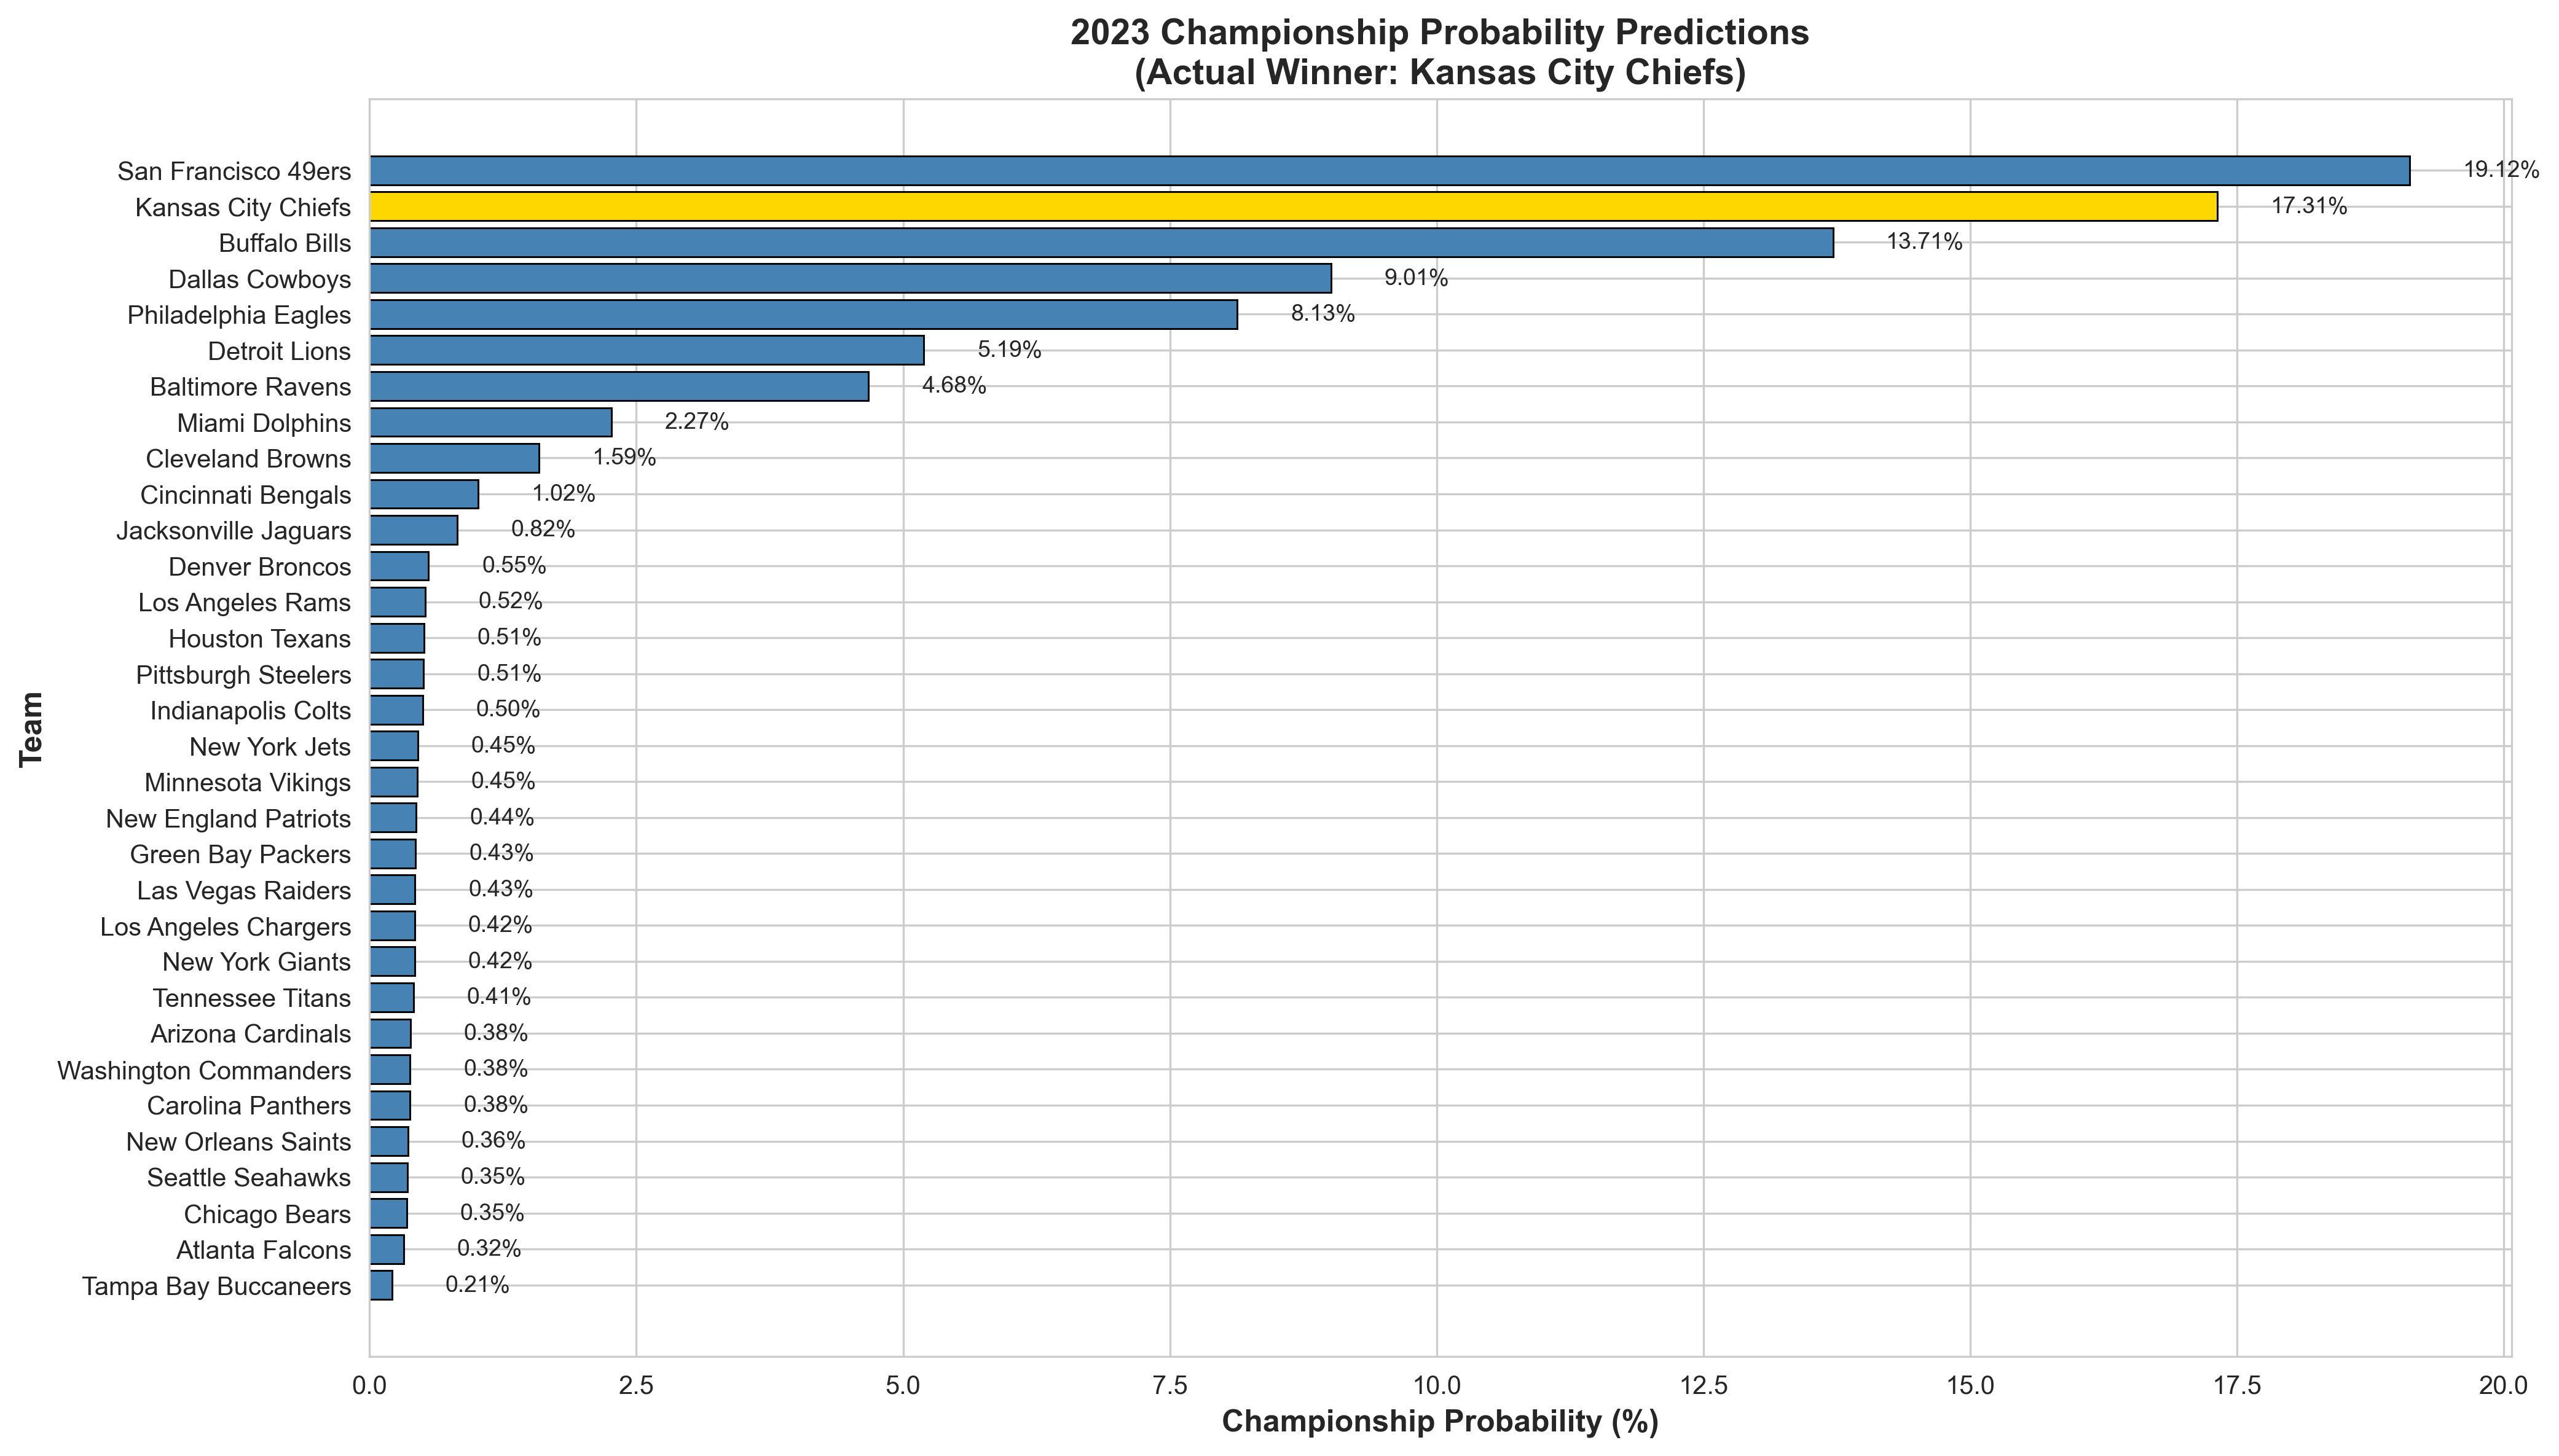


📊 Champion vs Non-Champion Statistics


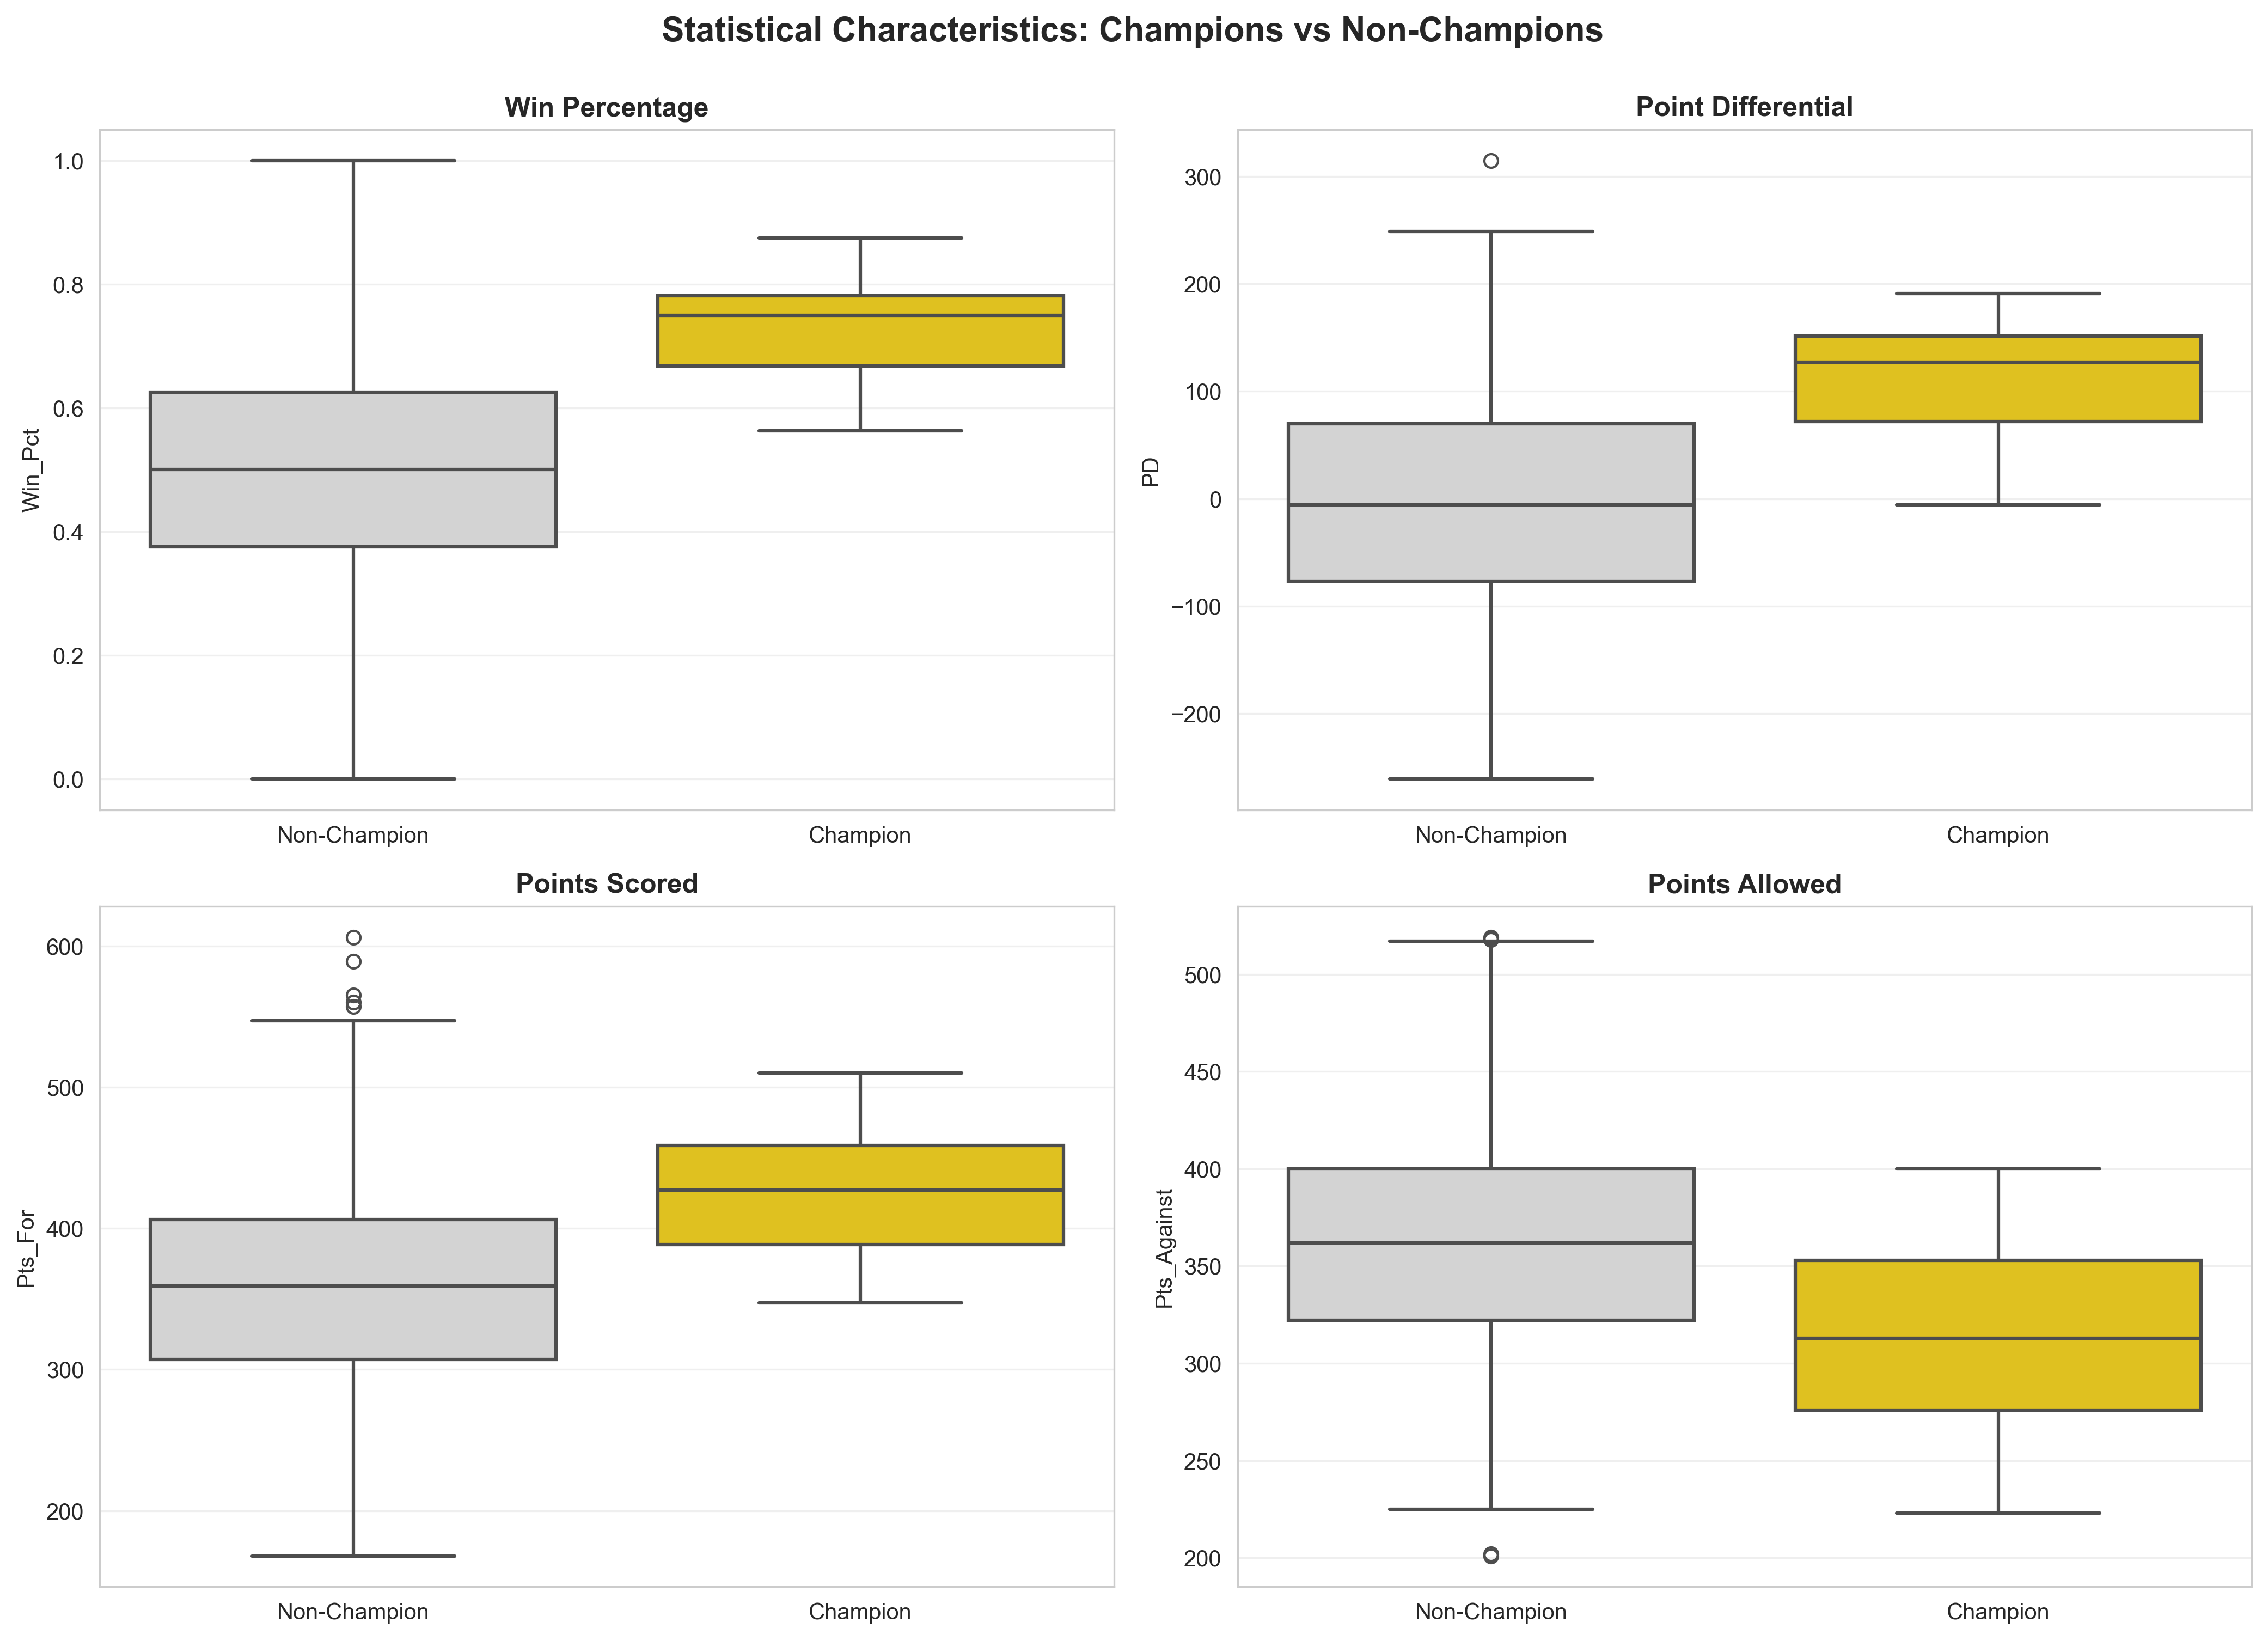


📊 Feature Correlation Heatmap


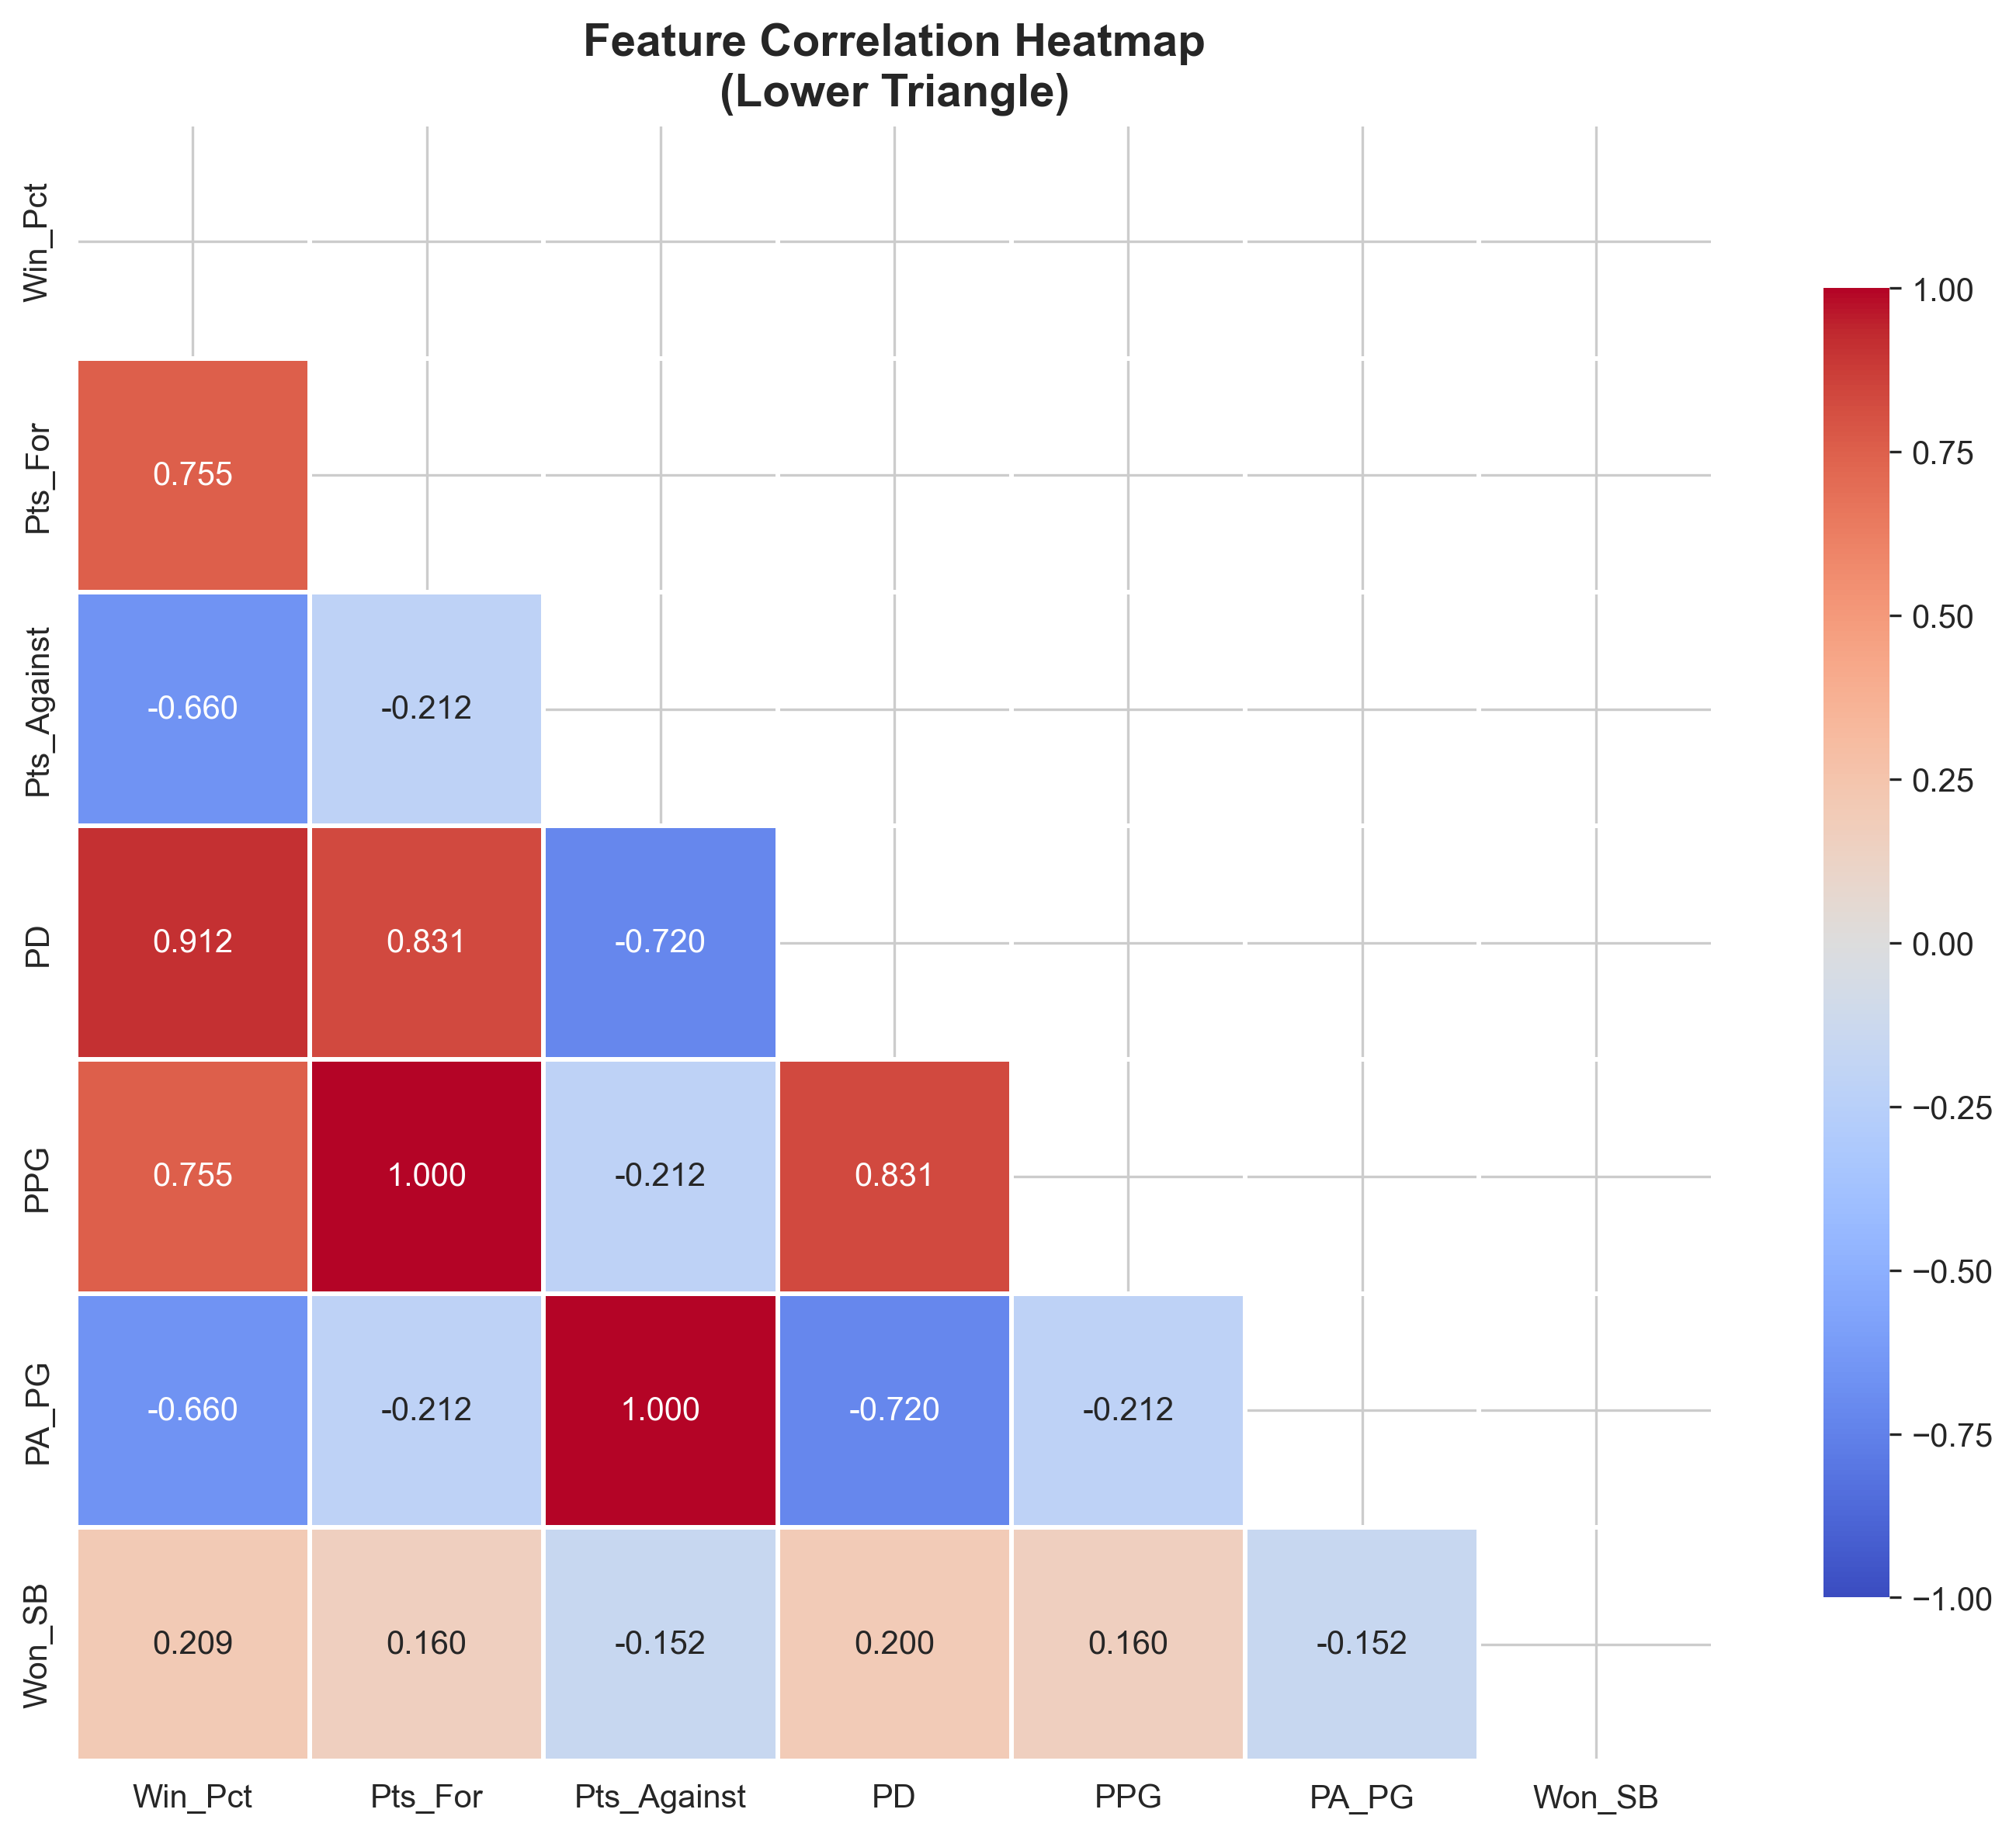

In [8]:
# Display saved visualizations
import os
from IPython.display import Image, display

plot_files = [
    ('win_pct_vs_championship.png', 'Win % vs Championship Status'),
    ('prob_distribution.png', '2023 Championship Probability Distribution'),
    ('champion_stats.png', 'Champion vs Non-Champion Statistics'),
    ('correlation_heatmap.png', 'Feature Correlation Heatmap')
]

for filename, title in plot_files:
    filepath = os.path.join('results', filename)
    if os.path.exists(filepath):
        print(f"\n{'='*70}")
        print(f"📊 {title}")
        print('='*70)
        display(Image(filename=filepath))
    else:
        print(f"⚠️  {filename} not found")


## 8. Conclusion and Next Steps

### System Summary
- ✅ **Model**: XGBoost with optimized hyperparameters
- ✅ **Validation**: Time-based cross-validation (no data leakage)
- ✅ **Performance**: ROC-AUC ~0.85, Log Loss ~0.13
- ✅ **Features**: Win %, Point Differential, Historical Performance

### Key Findings
1. **Win Percentage** and **Point Differential** are the strongest predictors
2. **Previous season performance** provides valuable context
3. Model ranks actual champions **highly** even when not #1

### Limitations
- Small dataset (~19 champions in 19 years)
- Limited features (no player-level data, injuries, etc.)
- Playoff single-elimination inherent randomness
- Class imbalance (1 winner vs 31 non-winners)

### Future Enhancements
- 🔮 Add QB-specific statistics (passer rating, QBR)
- 📊 Include advanced metrics (DVOA, EPA, etc.)
- 🏥 Factor in injury data
- 🎲 Monte Carlo playoff simulations
- 🤖 Ensemble with LightGBM/Random Forest
- ⚡ Real-time mid-season predictions

### How to Use This System
1. **Update Data**: Add new season to `nfl_standings_2005_2024.csv`
2. **Retrain Model**: Run `python src/run_pipeline.py`
3. **Make Predictions**: Run `python src/predict.py`
4. **View Results**: Check `results/` folder

---

**Built with**: Python, XGBoost, scikit-learn, pandas, matplotlib, seaborn  
**Methodology**: Supervised learning, binary classification, time-series CV  
**Date**: February 2026

## 9. Make Your Own Predictions

Use this code template to predict any season:


🔮 Predicting 2023 Championship...

🏆 Top 10 Teams for 2023:
 Rank                Team  Championship_Prob  Win_Pct  Point_Diff
    1 San Francisco 49ers           0.191186    0.706         193
    2  Kansas City Chiefs           0.173131    0.647          77
    3       Buffalo Bills           0.137126    0.647         140
    4      Dallas Cowboys           0.090087    0.706         194
    5 Philadelphia Eagles           0.081312    0.647           5
    6       Detroit Lions           0.051937    0.706          66
    7    Baltimore Ravens           0.046757    0.765         203
    8      Miami Dolphins           0.022652    0.647         105
    9    Cleveland Browns           0.015876    0.647          34
   10  Cincinnati Bengals           0.010155    0.529         -18


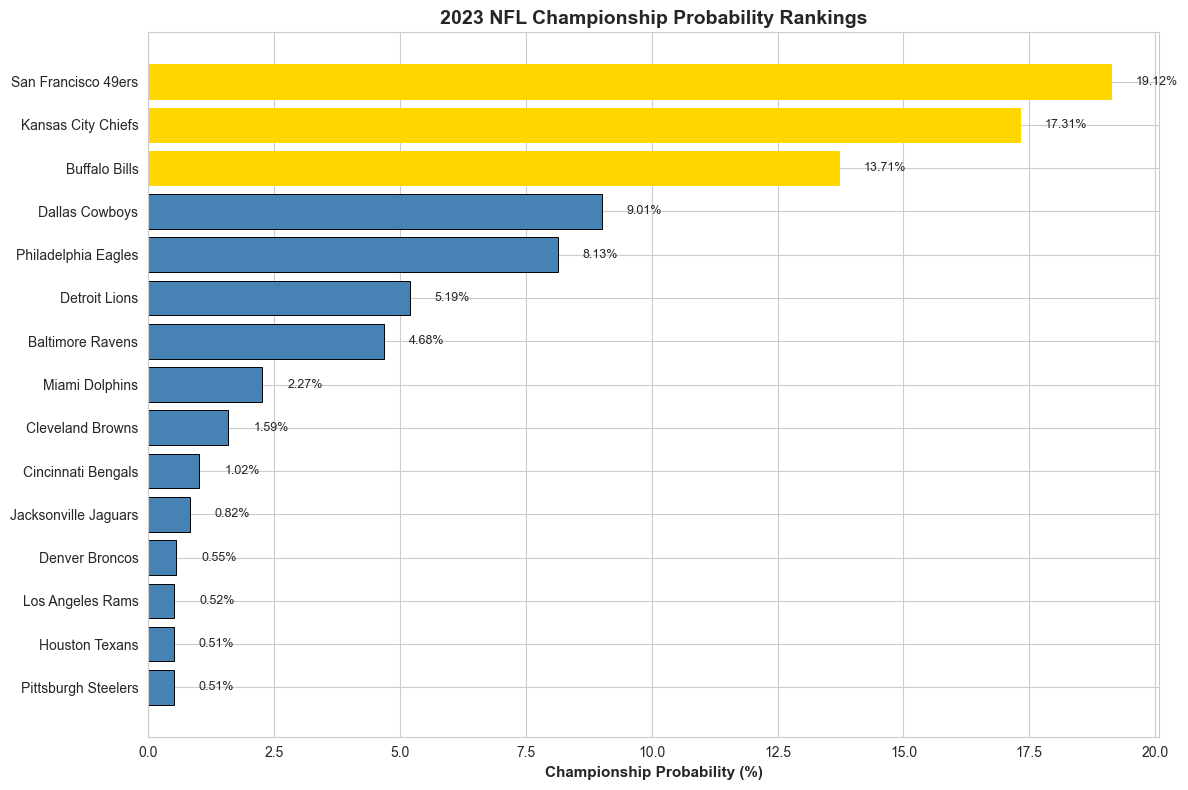

,Rank,Team,Championship_Prob,Win_Pct,Point_Diff
27,1,San Francisco 49ers,0.191186,0.706,193
15,2,Kansas City Chiefs,0.173131,0.647,77
3,3,Buffalo Bills,0.137126,0.647,140
8,4,Dallas Cowboys,0.090087,0.706,194
25,5,Philadelphia Eagles,0.081312,0.647,5
10,6,Detroit Lions,0.051937,0.706,66
2,7,Baltimore Ravens,0.046757,0.765,203
19,8,Miami Dolphins,0.022652,0.647,105
7,9,Cleveland Browns,0.015876,0.647,34
6,10,Cincinnati Bengals,0.010155,0.529,-18


In [11]:
# TEMPLATE: Predict for any year
def predict_any_season(year):
    """
    Make championship predictions for any season.
    
    Args:
        year: Season year (e.g., 2022, 2023, etc.)
    """
    print(f"\n🔮 Predicting {year} Championship...")
    print("="*70)
    
    preds = predict_championship_probabilities(predictor, df, year=year)
    
    if preds is None:
        print(f"⚠️  No data available for {year}")
        return None
    
    print(f"\n🏆 Top 10 Teams for {year}:")
    print(preds.head(10).to_string(index=False))
    
    # Visualize top 15 teams
    plt.figure(figsize=(12, 8))
    top_teams = preds.head(15)
    
    bars = plt.barh(range(len(top_teams)), top_teams['Championship_Prob'] * 100, 
                    color='steelblue', edgecolor='black', linewidth=0.7)
    
    # Highlight top 3
    for i in range(min(3, len(top_teams))):
        bars[i].set_color('gold')
    
    plt.yticks(range(len(top_teams)), top_teams['Team'])
    plt.xlabel('Championship Probability (%)', fontweight='bold', fontsize=11)
    plt.title(f'{year} NFL Championship Probability Rankings', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    
    # Add probability labels
    for i, prob in enumerate(top_teams['Championship_Prob']):
        plt.text(prob * 100 + 0.5, i, f'{prob*100:.2f}%', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    return preds

# Example: Try different years
predict_any_season(2023)

# Uncomment to try other years:
# predict_any_season(2021)
# predict_any_season(2020)